# **Create visualizations using Matplotib, Seaborn and Folium**



```
# This is formatted as code
```



In [2]:
%pip install seaborn
%pip install folium

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# **Project overview**
This project is to create visualizations to analyze historical automobile sales data during recession periods. The dataset, "historical_automobile_sales," provides information on automobile sales and related variables during both recessionary and non-recessionary periods. The objective is to understand the impact of recessions on automobile sales by examining factors such as GDP, unemployment rate, consumer confidence, price, advertising expenditure, vehicle type, and competition.

Recession periods specified in the dataset are:

- Recession period 1: Year 1980
-Recession period 2: Years 1981 to 1982
-Recession period 3: Year 1991
-Recession period 4: Years 2000 to 2001
-Recession period 5: Year-end 2007 to mid-2009
-Recession period 6: Year 2020 - February to April (Covid-19 Impact)

By analyzing this data, the project aims to gain insights into how these recession periods affected automobile sales for the company. The visualization will help in understanding trends and patterns in automobile sales during both recession and non-recession periods, contributing to strategic decision-making and future planning.

# Importing Data


In [6]:
import requests
import pandas as pd

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

response = requests.get(URL)

# Now you can read the CSV from the response content
df = pd.read_csv(URL)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [7]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [8]:
df.columns
df.tail(25)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
503,12/31/2021,2021,Dec,0,101.13,0.34,27814.846,1454,6,32.066,-0.075501,2.1,4330.8,Mediumfamilycar,Georgia
504,1/31/2022,2022,Jan,0,108.68,0.50,21746.787,3953,8,13.621,-1.354159,2.8,4709.8,Executivecar,Georgia
505,2/28/2022,2022,Feb,0,82.04,0.75,22564.373,2708,4,19.713,0.309035,1.5,925.6,Mediumfamilycar,New York
506,3/31/2022,2022,Mar,0,113.11,1.50,22038.030,4472,8,36.491,0.459785,1.2,2258.9,Mediumfamilycar,New York
507,4/30/2022,2022,Apr,0,106.94,1.00,20680.046,3969,7,41.086,0.111839,2.1,863.2,Mediumfamilycar,California
508,5/31/2022,2022,May,0,96.73,1.50,25242.608,4028,9,35.949,-0.142897,2.5,1483.3,Mediumfamilycar,Georgia
509,6/30/2022,2022,Jun,0,88.10,0.75,20845.249,4547,6,43.294,0.169654,2.1,1565.7,Sports,Illinois
510,7/31/2022,2022,Jul,0,112.49,0.50,26352.284,1701,5,47.018,0.079204,1.6,2629.4,Smallfamiliycar,California
511,8/31/2022,2022,Aug,0,97.00,0.25,24748.809,3681,7,13.076,-2.595748,3.0,1739.6,Sports,Illinois
512,9/30/2022,2022,Sep,0,99.80,0.07,23805.260,4629,6,39.418,0.668273,1.8,996.0,Executivecar,New York


---


# Creating Visualizations for Data Analysis



# **Exploring Automobile Sales Over Time**

This visualization showcases the trend of automobile sales over time using a line chart.
- X-axis: Time intervals
- Y-axis: Number of automobile sales
- Line chart: Represents sales volume over time
-Insights:Shows how events like recessions affect sales trends
- Purpose: This visualization helps stakeholders understand historical sales performance, identify trends, and make informed business decisions.

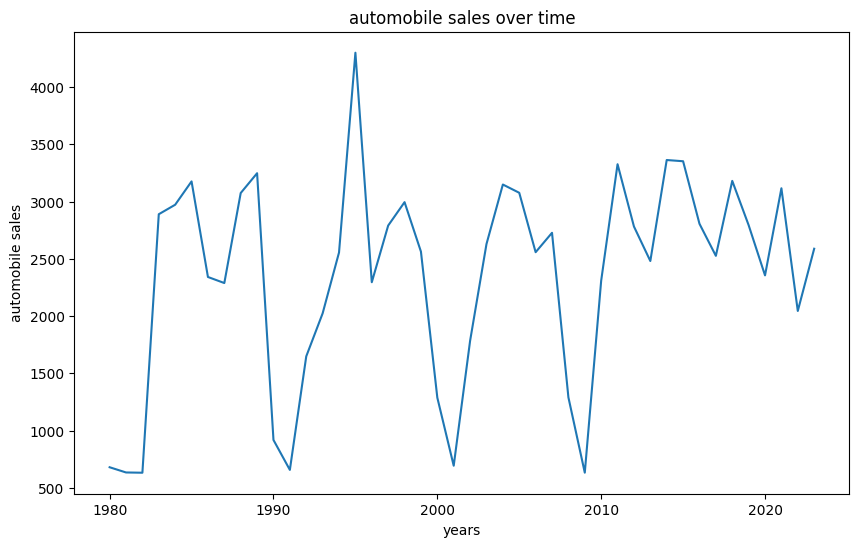

In [9]:
    df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
    #create figure
    plt.figure(figsize=(10, 6))
    df_line.plot(kind = 'line')
    plt.xlabel('years')
    plt.ylabel('automobile sales')
    plt.title('automobile sales over time')
    plt.show()

## **Identify the years of recession annotation for at least two years of recession**



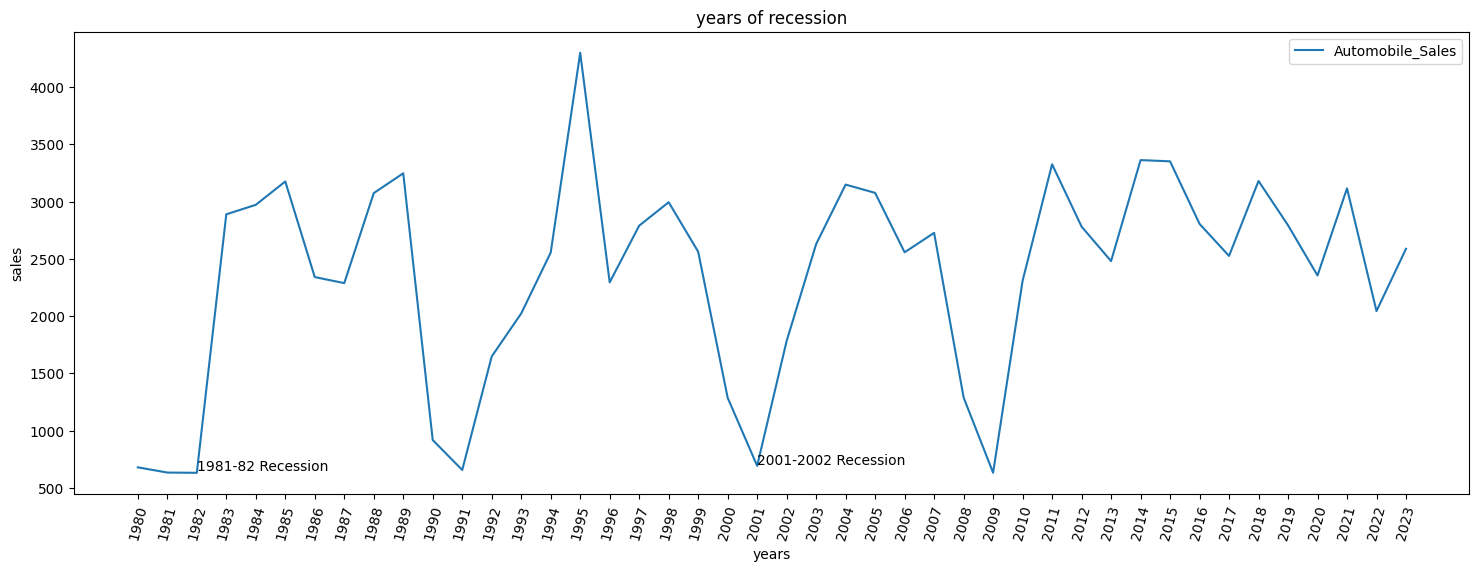

In [10]:
plt.figure(figsize=(18, 6))
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('years')
plt.ylabel('sales')
plt.title('years of recession')
plt.text(1982, 650, '1981-82 Recession')
plt.text(2001, 700, '2001-2002 Recession')
plt.legend()
plt.show()


## **Analyzing Sales Trends Across Vehicle Types**

- Visualization: Multiple lines representing different vehicle types
- X-axis: Time intervals
- Y-axis: Number of automobile sales
- Insights: Analyzes sales trends across different vehicle types during recession periods
- Purpose: To determine if there is a noticeable difference in sales trends between vehicle types during recession periods.


<details><summary>Click here for a hint</summary>

    <p>
    You will require:-
    <br>create a separate dataframe where the column recession has a value of '1'
    <br>to group the year, vehicle_type and calculate the average on the 'Automobile Sales'
    <br>one way is to -
    <br>use as_index as false else you will endup with multiple-indexed datafame
    <br>later set year as index and groupby vehicle over Sales and plot
    <br>make use of .plot() with kind = 'line'
    <br>do not forget to include labels and title
</details>


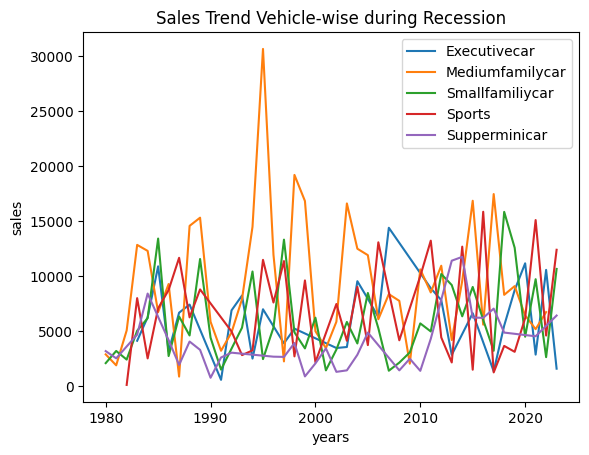

In [11]:
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('years')
plt.ylabel('sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

----


## **Comparing Sales in Recession vs. Non-Recession Periods**

- Visualization: Bar chart comparing sales during recession and non-recession - periods
- X-axis: Recession and Non-Recession
- Y-axis: Number of automobile sales
- Insights: Highlights the contrast in sales volumes between recession and non-recession periods
- Purpose: To visually analyze and understand the impact of recession on automobile sales.

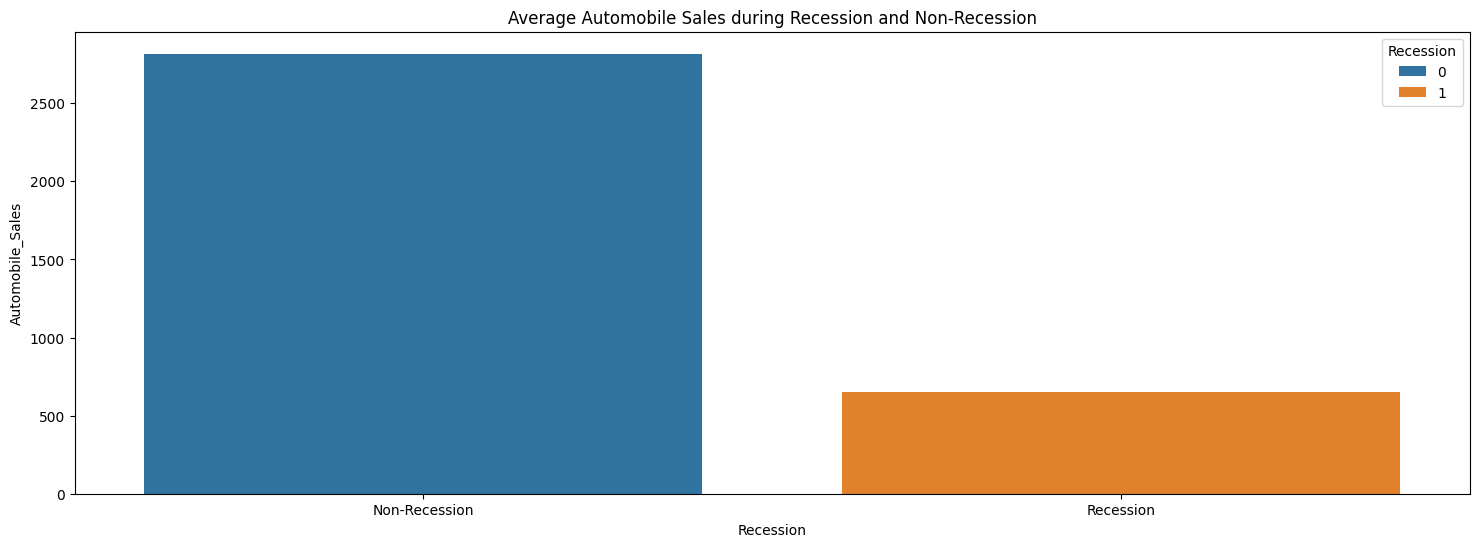

In [12]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(18,6 ))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Recession')
plt.ylabel('Automobile_Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()


## **Comparing Sales of Different Vehicle Types**

- Visualization: Bar chart comparing sales of different vehicle types during
recession and non-recession periods
- X-axis: Recession and Non-Recession
- Y-axis: Number of automobile sales
- Insights: Analyzes the variation in sales across vehicle types between recession and non-recession periods
- Purpose: To understand the sales performance of various vehicle types during economic downturns compared to stable periods.
- Inference:
From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.
However, the most affected type of vehicle is executivecar and sports


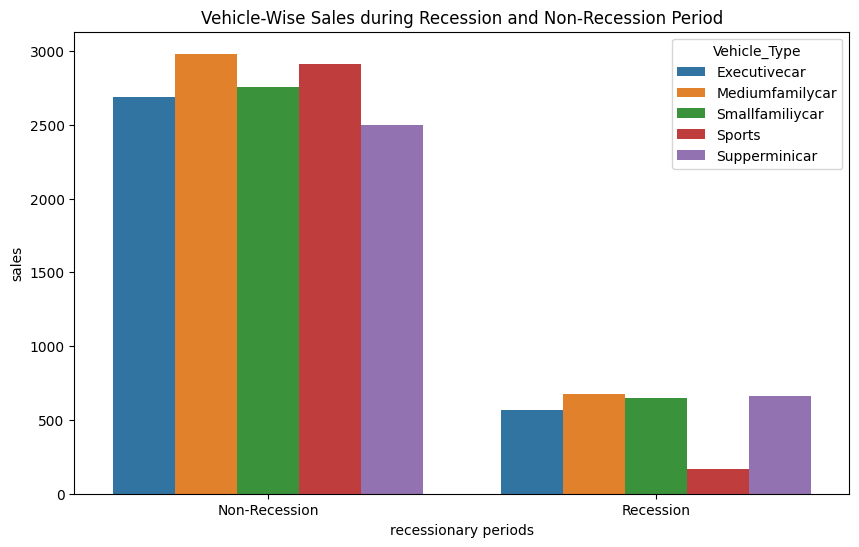

In [13]:

recession_data = df[df['Recession'] == 1]
dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('recessionary periods')
plt.ylabel('sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

## **Comparing Variations in GDP During Recession and Non-Recession Periods**

- **Visualization:** Subplots comparing variations in GDP during recession and non-recession periods
- **X-axis:** Time intervals
- **Y-axis:** GDP value
- **Insights:** Analyzes the differences in GDP trends between recession and non-recession periods
- **Purpose:** To understand the impact of economic downturns on GDP fluctuations compared to stable periods.
- **Inference:** During recession, the GDP of the country was in a low range, might have afected the overall sales of the company



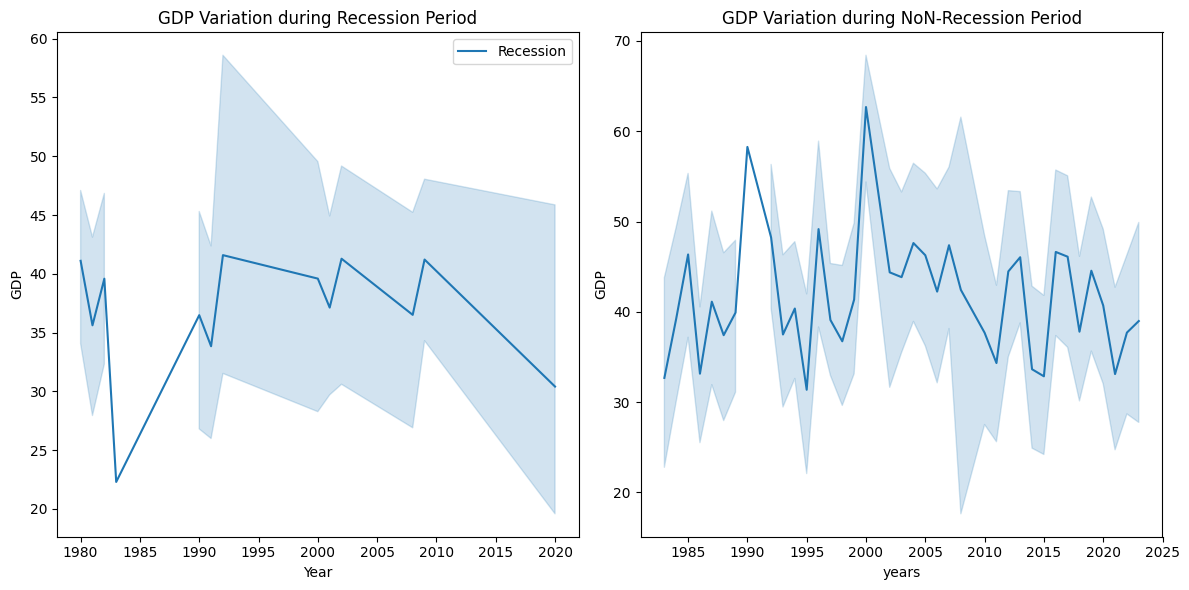

In [14]:
    #Create dataframes for recession and non-recession period
    rec_data = df[df['Recession'] == 1]
    non_rec_data = df[df['Recession'] == 0]

    #Figure
    fig=plt.figure(figsize=(12, 6))

    #Create different axes for subploting
    ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
    ax1 = fig.add_subplot(1 ,2 ,2 ) # add subplot 2 (1 row, 2 columns, second plot).

    #plt.subplot(1, 2, 1)
    sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
    ax0.set_xlabel('Year')
    ax0.set_ylabel('GDP')
    ax0.set_title('GDP Variation during Recession Period')

    #plt.subplot(1, 2, 2)
    sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='',ax=ax1)
    ax1.set_xlabel('years')
    ax1.set_ylabel('GDP')
    ax1.set_title('GDP Variation during NoN-Recession Period')

    plt.tight_layout()
    plt.show()

###  Bubble plot for displaying the impact of seasonality on Automobile Sales.


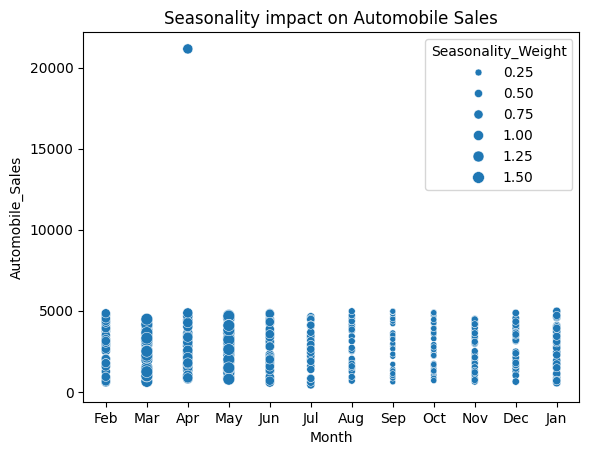

In [15]:
non_rec_data = df[df['Recession'] == 0]

size=non_rec_data['Seasonality_Weight'] #for bubble effect

sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)

#you can further include hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

## **Inference**
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April



---


## **Identifying Correlation Between Average Vehicle Price and Sales Volume During Recessions**

- **Visualization:** Scatter plot to identify the correlation between average vehicle price and sales volume during recessions
- **X-axis:** Average vehicle price
- **Y-axis:** Sales volume
- **Insights:** Analyzes the relationship between average vehicle price and sales volume during recession periods
- **Purpose:** To understand how changes in average vehicle price affect sales volume during economic downturns.





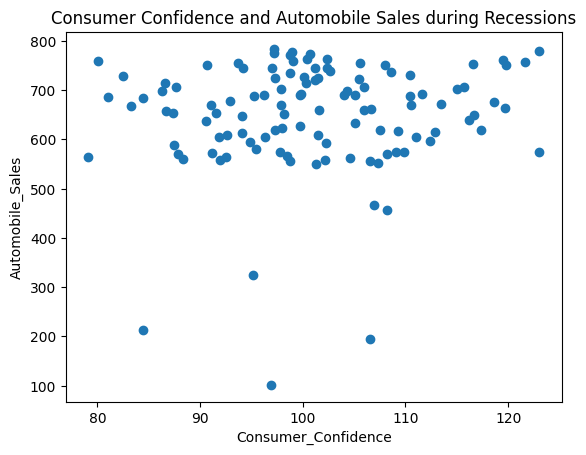

In [16]:
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

plt.xlabel('Consumer_Confidence')
plt.ylabel('Automobile_Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()



```
# This is formatted as code
```


 ##  Average vehicle price relate to the sales volume during recessions


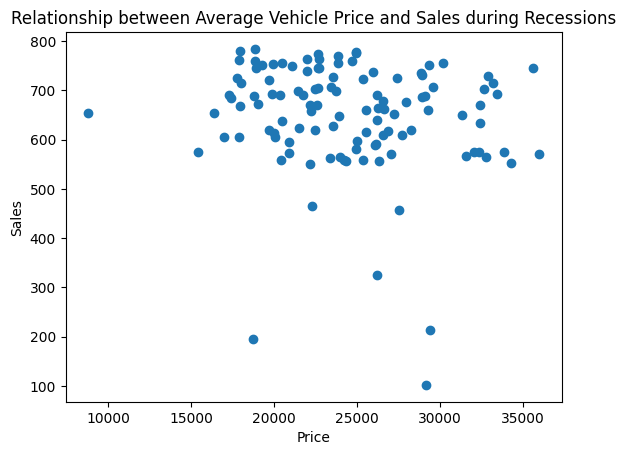

In [17]:
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])

plt.xlabel('Price')
plt.ylabel('Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

## Inference
### **There is not much relation!**


----


## **Portion of Advertising Expenditure During Recession and Non-Recession Periods**

- **Visualization:** Pie chart displaying the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods
- **Insights:** Analyzes the distribution of advertising expenditure between recession and non-recession periods
- **Purpose:** To visualize the proportion of advertising expenditure during economic downturns compared to stable periods.


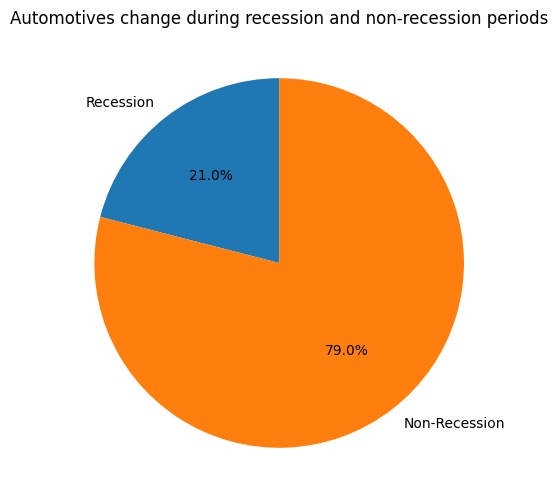

In [18]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Automotives change during recession and non-recession periods')

plt.show()

## **Total Advertisement Expenditure for Each Vehicle Type During Recession Period**

- **Visualization:** Pie chart displaying the total advertisement expenditure for each vehicle type during recession period
- **Insights:** Analyzes the distribution of advertisement expenditure across different vehicle types during recession
- **Purpose:** To visualize the allocation of advertisement expenditure among vehicle types during economic downturns.
- **Inference:** During recession the advertisements were mostly focued on low price range vehicle. A wise decision!


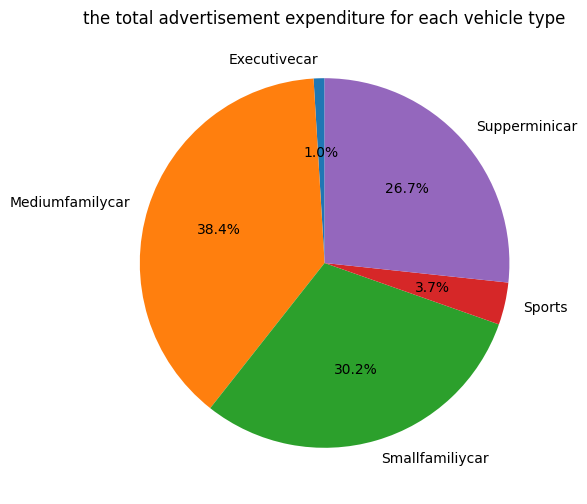

In [19]:
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTsales = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total sales during recessions
plt.figure(figsize=(18,6))

labels = VTsales.index
sizes = VTsales.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('the total advertisement expenditure for each vehicle type')

plt.show()

----


## **Analyzing the Effect of Unemployment Rate on Vehicle Type and Sales During the Recession Period**

- **Visualization:** Line plot depicting the relationship between the unemployment rate and vehicle type sales during the recession period
- **X-axis:** Time intervals
- **Y-axis:** Unemployment rate and number of automobile sales
- **Insights:** Examines how changes in the unemployment rate correspond to vehicle type sales during economic downturns
- **Purpose:** To investigate the influence of unemployment on vehicle sales and uncover any correlations or trends.
- **Inference:**During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar

<ipython-input-20-59a453784ef1>:2: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',


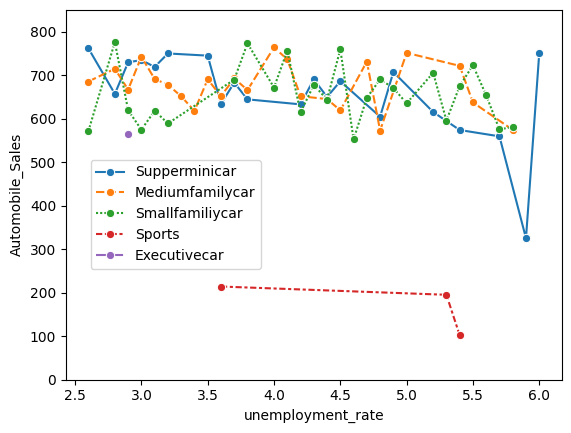

In [20]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))

---


## **Mapping the Highest Sales Regions/Offices During the Recession Period**

- **Visualization:** Map showing the highest sales regions or offices of the company during the recession period
- **Insights:** Identifies geographic areas with the highest sales performance during economic downturns
- **Purpose:** To visualize and understand the distribution of sales across different regions or offices during recession periods.


In [21]:
import requests

def download(url, filename):
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        with open(filename, 'wb') as file:
            file.write(response.content)
        print(f"File '{filename}' downloaded and saved successfully.")
    else:
        print(f"Failed to download the file. Status code: {response.status_code}")

# Example usage
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
download(path, "us-states.json")

File 'us-states.json' downloaded and saved successfully.


In [22]:
import folium

# Filter the data for the recession period and specific cities
recession_data =df[df['Recession']==1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data='us-states.json',  # Provide the correct path or URL to the GeoJSON file
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)

# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1


This project utilizes the contributions of [Dr. Pooja](author_link) and this project was a part of the final project for obtaining my IBM Data Analytics certification